### Goals
- Explore the data (however small). 
- See what different kinds of representations make sense. 
- Start to figure out what the vis will look like. 

In [48]:
# import modules
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim

In [24]:
# load data
data = pd.read_excel('newspaper_data.xlsx')

In [25]:
data.columns

Index(['object', 'human?', 'category', 'occupation', 'age', 'from', 'to',
       'month', 'year'],
      dtype='object')

In [27]:
# Compare number of human vs non-human movements.
print('Humans = ' + str(len(data[data['human?']=='Yes'])) + ', Non-humans = ' + str(len(data[data['human?']=='No'])))

Humans = 32, Non-humans = 5


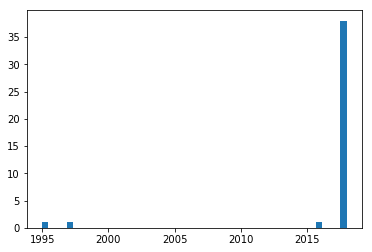

In [28]:
# Plot a histogram of years. Probably not super helpful but whatevs.
plt.hist(data['year'][data['year'] > 1900], bins=50)
plt.show()

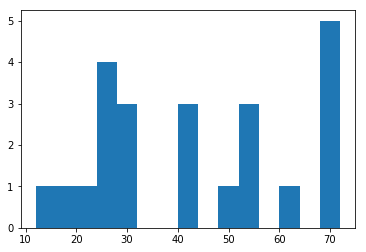

In [39]:
# Plot a histogram of ages. 
plt.hist(data['age'][data['age'].notnull()], bins=15)
plt.show()

In [45]:
# Calculate distance of movement and add as a column. 
# Use geopy to do this.

def geolocate_from_to(data):
    geolocator = Nominatim()
    data['from_location'] = data['from'].apply(lambda x: geolocator.geocode(x))
    data['to_location'] = data['to'].apply(lambda x: geolocator.geocode(x))
    return data

In [58]:
data['from_location'][data['from_location'].notnull()]

0     (Cave, RM, LAZ, Italia, (41.8179234, 12.9283673))
1     (Washington, District of Columbia, United Stat...
2     (Washington, District of Columbia, United Stat...
3     (Washington, District of Columbia, United Stat...
4     (London, Greater London, England, SW1A 2DU, UK...
5     (Washington, District of Columbia, United Stat...
6     (Patuakali DC Office field(Hally Pad), পটুয়াখা...
7     (France métropolitaine, France, (46.603354, 1....
8                  (Hrvatska, (45.5643442, 17.0118954))
9       (England, UK, (52.7954791, -0.540240286617432))
10    (België / Belgique / Belgien, (50.6407351, 4.6...
11    (BXL, Brussel-Hoofdstad - Bruxelles-Capitale, ...
12    (Washington, District of Columbia, United Stat...
13    (평양, 중구역, 평양시, 조선민주주의인민공화국, (39.0194741, 125.7...
14    (Tapachula, Chiapas, México, (14.92746, -92.32...
15                (Honduras, (15.0610686, -84.5978534))
16                       (Brasil, (-10.3333333, -53.2))
17    (Washington, District of Columbia, United 

/Users/emilywillson/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


AttributeError: 'NoneType' object has no attribute 'latitude'

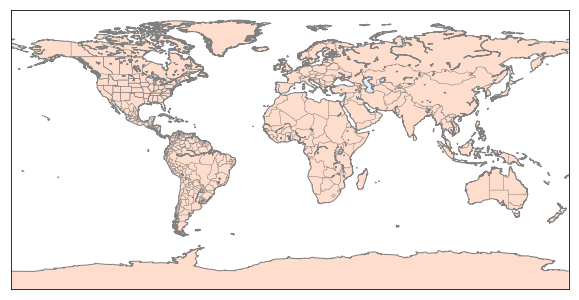

In [52]:
# Actually plot the from and to movement locations. 
# 1. create the map
plt.figure(figsize=(10,10))
m = Basemap(projection='cyl', resolution='l', 
            llcrnrlat=-90, urcrnrlat=90,
           llcrnrlon=-180, urcrnrlon=180)
m.fillcontinents(color='#FFDDCC', lake_color='#DDEEFF')
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. plot the from locations on the map. 
m.scatter(data['from_location'].map(lambda x: x.latitude), data['from_location'].map(lambda x: x.longitude), latlon=True, c='red')

# 3. plot the to locations on the map. 

# 4. create a 


In [ ]:
# Just plot Trump's movements.

In [ ]:
# Calculate metacategories (i.e. politician, civilian). Compare these. 

In [46]:
# Write the updated file out to a csv
data.to_csv('newspaper_data_updated')